<a href="https://colab.research.google.com/github/ssuxmin/tmp/blob/main/%5BEDA%5D_%EC%9D%8C%EC%84%B1_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_%EB%B0%8F_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import librosa
import librosa.display as dsp
from IPython.display import Audio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train = pd.read_csv('./train.csv')
train.head()

,id,path,label
0,TRAIN_0000,./train/TRAIN_0000.wav,1
1,TRAIN_0001,./train/TRAIN_0001.wav,2
2,TRAIN_0002,./train/TRAIN_0002.wav,4
3,TRAIN_0003,./train/TRAIN_0003.wav,5
4,TRAIN_0004,./train/TRAIN_0004.wav,4


In [ ]:
train.shape

(5001, 3)

- 총 5001개의 데이터가 존재함

In [ ]:
train.label.groupby(train.label).count()

label
0    867
1    848
2    859
3    852
4    722
5    853
Name: label, dtype: int64

In [ ]:
X = train.id.groupby(train.label).count().index
Y = train.id.groupby(train.label).count()

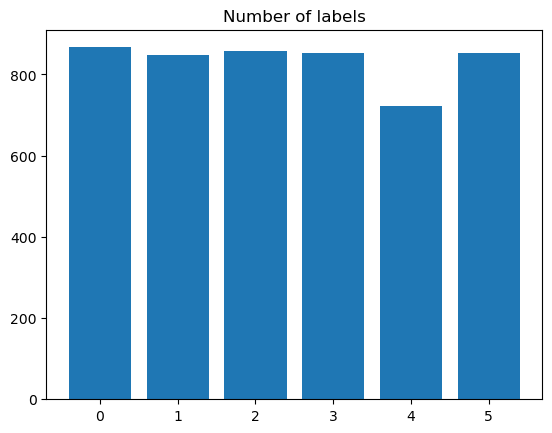

In [ ]:
plt.bar(X, Y)
plt.xticks(X)
plt.title("Number of labels")
plt.show()

- label당 데이터가 800여개 존재
- class imbalance 미미한 수준

In [ ]:
from tqdm import tqdm

len_list = []

for i in tqdm(train.id):
    y, s = librosa.load('./train/' + i + '.wav')
    len_list.append(len(y)/s)

100%|██████████| 5001/5001 [02:11<00:00, 38.17it/s]


<AxesSubplot:title={'center':'Length of audio'}, ylabel='Density'>

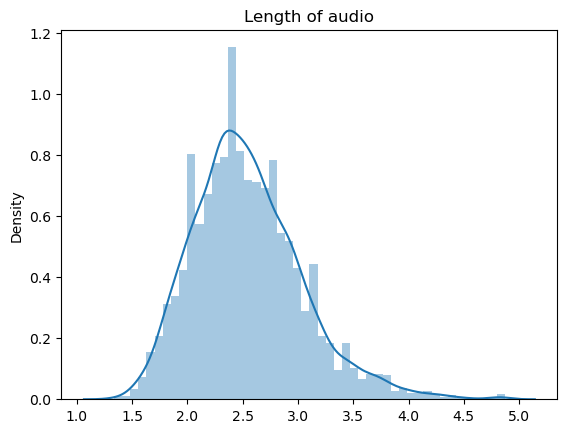

In [ ]:
# len_list로 정규분포 확인
plt.title("Length of audio")
sns.distplot(len_list)

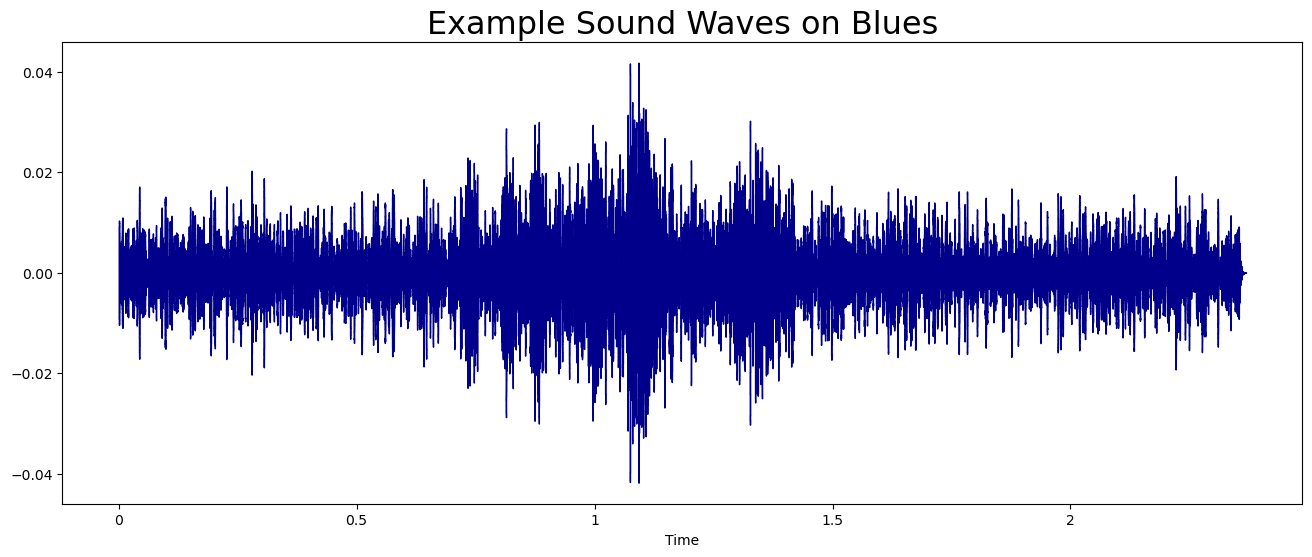

In [ ]:
y,s = librosa.load('./train/TRAIN_0000.wav')

audio, _ = librosa.effects.trim(y)

plt.figure(figsize = (16, 6))
librosa.display.waveshow(y = audio, sr = s, color = "#00008B");
plt.title("Example Sound Waves on Blues", fontsize = 23);

In [ ]:
fft = 2048
hl = 512

stft = np.abs(librosa.stft(audio, n_fft = fft, hop_length = hl))

print(np.shape(stft))

(1025, 103)


### FFT(Fast Fourier Transform)

- Fourier Transform: 입력 신호를 다양한 주파수를 가지는 주기함수들로 분해하는 것

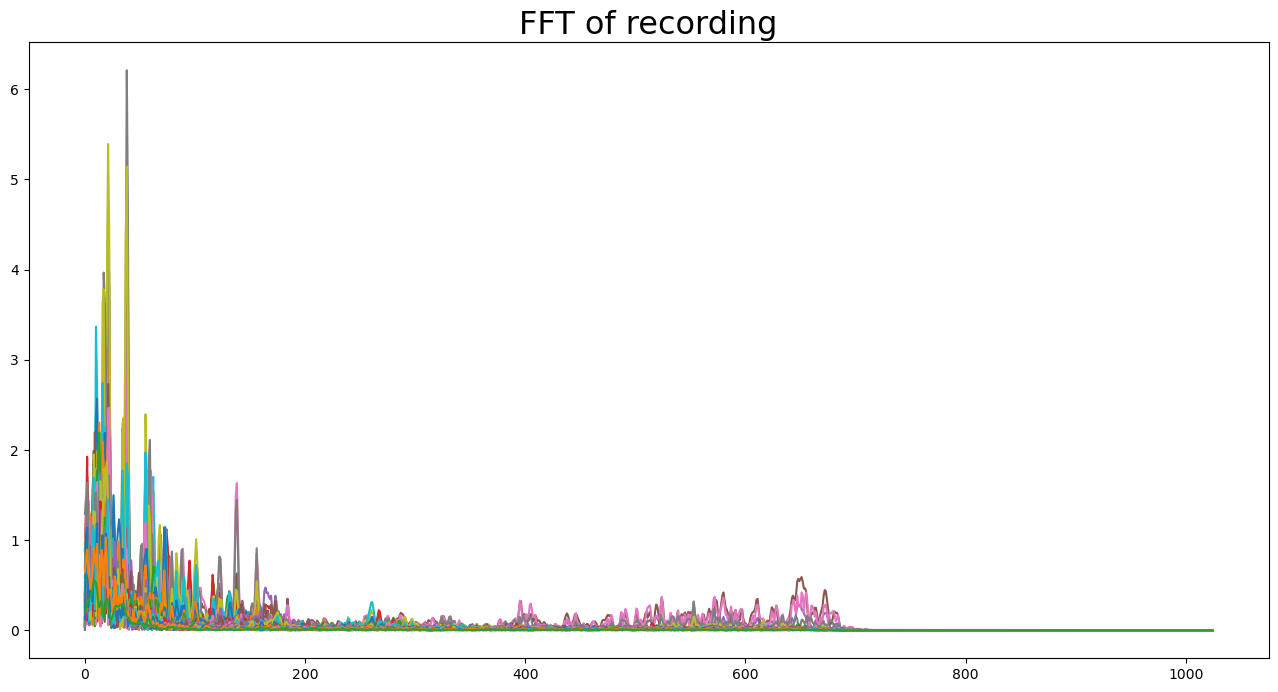

In [ ]:
plt.figure(figsize = (16, 8))
plt.title("FFT of recording", fontsize = 23);
plt.plot(stft);

- 0~200 주파수 대역에 데이터가 몰려있음

### Mel Spectrogram

- mel scale: 주파수 척도를 인간의 청각 특성에 맞게 변환한 척도

In [ ]:
def Mel_s(num = 0, frame_length = 0.025, frame_stride = 0.010):
    sample = os.listdir('./train')
    temp = train[train.label == num].id
    file_name = temp[temp.index[0]]
    
    file = './train/' + file_name + '.wav'
    data,sample_rate = librosa.load(file, sr = 16000)
    
    input_nfft = int(round(sample_rate*frame_length))
    input_stride = int(round(sample_rate*frame_stride))
    
    S = librosa.feature.melspectrogram(y=data, n_mels=100, n_fft=input_nfft, hop_length=input_stride)
    
    print("Wav length: {}, Mel_S shape:{}".format(len(data)/sample_rate, np.shape(S)))
    
    S_dB  = librosa.power_to_db(S, ref=np.max)
    fig = plt.figure(figsize = (14,5))
    librosa.display.specshow(S_dB, 
                             sr=sample_rate, 
                             hop_length=input_stride,
                             x_axis='time',
                             y_axis='log')
    plt.xlabel("Time")
    plt.ylabel("Frequency")
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"Mel spectrogram of audio label {num}")
    plt.show()

Wav length: 2.06875, Mel_S shape:(100, 207)


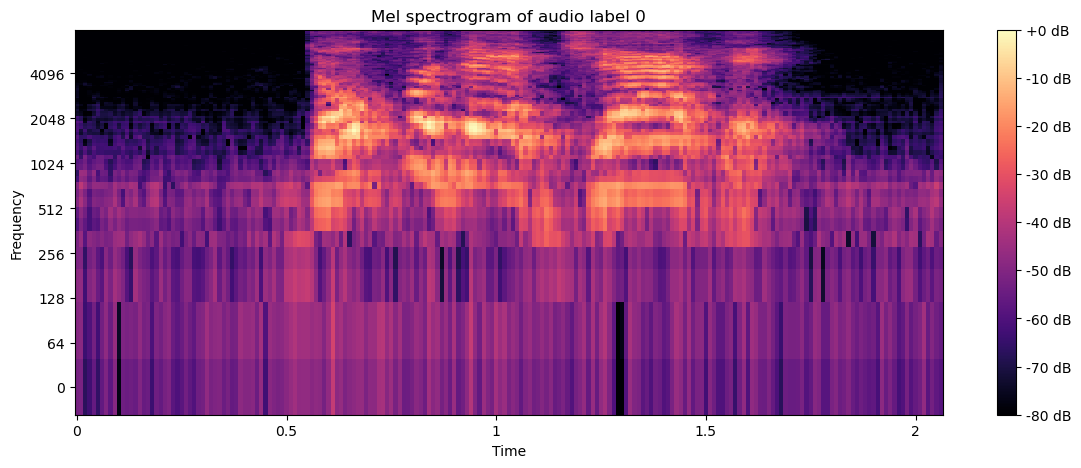

Wav length: 2.369, Mel_S shape:(100, 237)


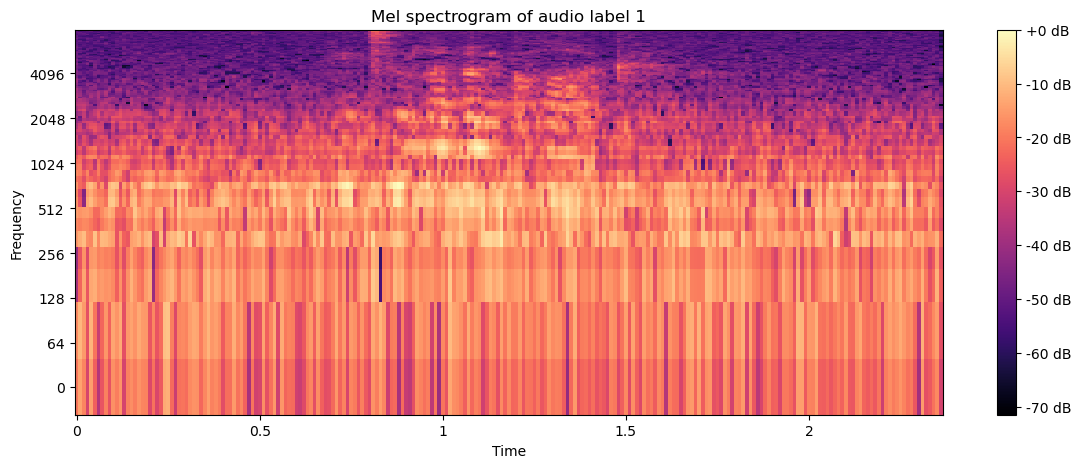

Wav length: 2.602625, Mel_S shape:(100, 261)


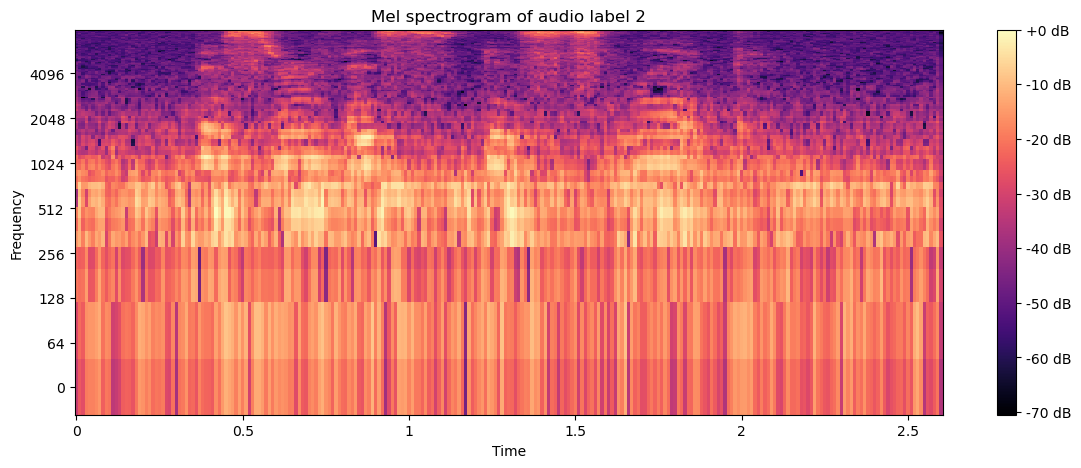

Wav length: 2.5025, Mel_S shape:(100, 251)


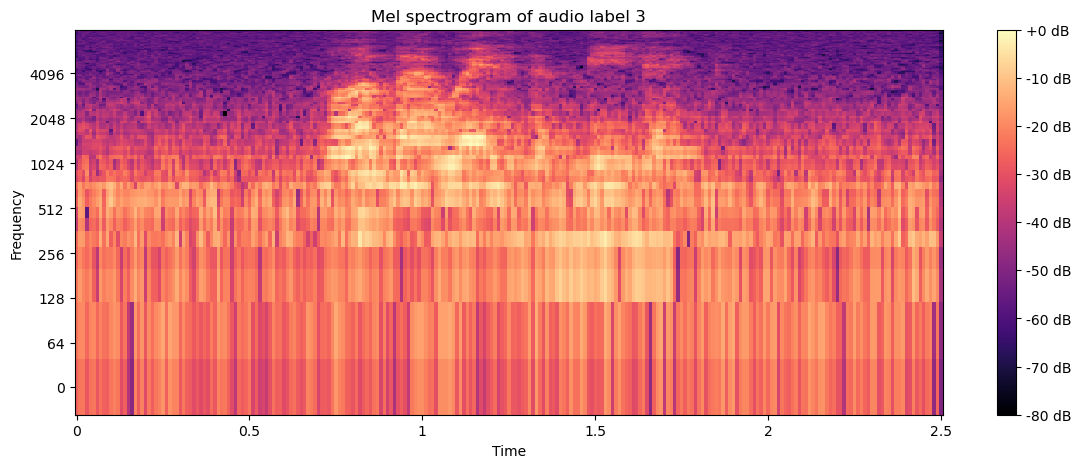

Wav length: 2.902875, Mel_S shape:(100, 291)


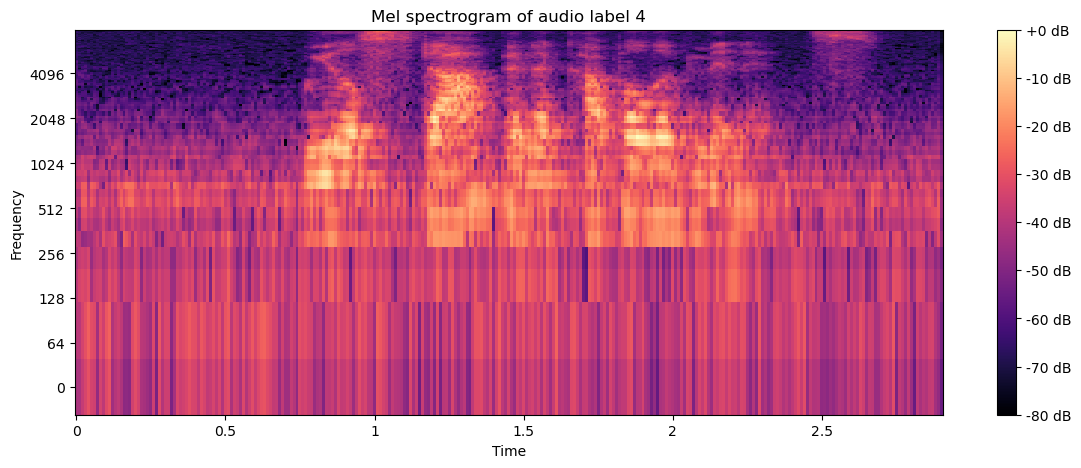

In [ ]:
for i in range(0,5):
    Mel_s(i)